In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [6]:
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")
df3 = pd.read_csv("df3.csv")

# df1.info()
# df2.info()
# df3.info()
# df1.describe(include="all")
# df2.describe(include="all")
# df3.describe(include="all")

In [7]:
df1.head()

,Unnamed: 0,country_code,country_name,country_continental,num_internet_plans,avg_price,min_price,max_price,avg_price_start_2021,avg_price_start_2020
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.90
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57
3,3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73
4,4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68


In [8]:
df2.head()

,Unnamed: 0,country_name,avg_speed
0,0,Canada,75.18
1,1,South Korea,117.95
2,2,Netherlands,108.33
3,3,Japan,44.05
4,4,Norway,134.73


In [9]:
df3.head()

,Unnamed: 0,country_name,country_subregion,country_region,internet_users,population
0,0,China,Eastern Asia,Asia,1010740000,1427647786
1,1,India,Southern Asia,Asia,833710000,1352642280
2,2,United States,Northern America,Americas,312320000,327096265
3,3,Indonesia,South-eastern Asia,Asia,196000000,267670543
4,4,Brazil,South America,Americas,160010801,209469323


## 1 - Quantas empresas foram consultadas?

In [10]:
total_planos = df1.num_internet_plans.sum()
total_planos

6063.0

## 2 - Calcule a Variação percentual entre o preço médio da internet entre o início 2020 e 2021, usando como base o preço de 2021.

Essa pergunta não foi muito bem formulada e possui algumas interpretações possíveis.
Responderei: Variação percentual do preço médio no ínicio de 2020 para o preço médio no início de 2021.

In [11]:
print(f'Variação percentual: {df1.avg_price_start_2021.sum()/df1.avg_price_start_2020.sum()*100:.2f}%')
print(f'Ou seja, o preço em 2021 foi, em média, 61.38% do preço em 2020. Ou ainda, {100-61.38}% menor.')

Variação percentual: 61.38%
Ou seja, o preço em 2021 foi, em média, 61.38% do preço em 2020. Ou ainda, 38.62% menor.


## 3 - Calcule o preço médio geral da internet dos países que sejam da SOUTH AMERICA.

In [12]:
#df1.country_continental.value_counts()
df_SA = df1[df1["country_continental"]=="SOUTH AMERICA"] 
df_SA = df_SA.assign(total_price = df_SA.avg_price*df_SA.num_internet_plans)
avg_price_SA = df_SA.total_price.sum()/df_SA['num_internet_plans'].sum()
print(f'Preço médio: {avg_price_SA:.2f}')


Preço médio: 2.16


## 4 - Qual os 5 países que tem a maior taxa de usabilidade de internet em relação a população?

In [13]:
df3 = df3.assign(razao = df3.internet_users/df3.population)
df3.sort_values("razao", ascending=False).head(5).country_name

192    Faroe Islands
177          Andorra
198    Liechtenstein
94            Kuwait
162          Iceland
Name: country_name, dtype: object

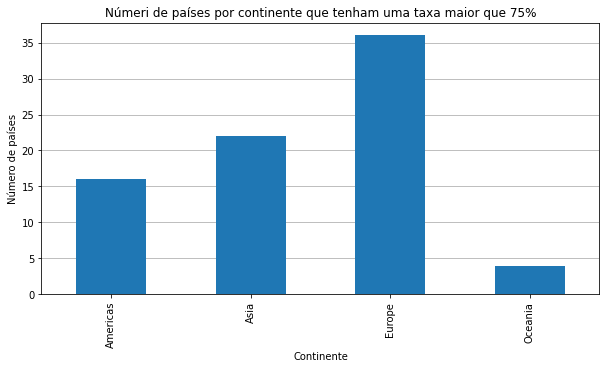

In [62]:
plt.figure(figsize=(10,5))
#sns.countplot(data=df3[df3['razao'] >= 0.75],x = 'country_region')
df3[df3.razao>=0.75].groupby("country_region").country_name.count().plot(kind="bar", zorder=2)
plt.title("Número de países por continente que tenham uma taxa maior que 75%")
plt.xlabel("Continente")
plt.ylabel("Número de países")
plt.grid(axis="y")
plt.show()

## 5 - Faça um gráfico que mostre o número de países que apresentem uma taxa de usabilidade maior que 75% agrupados por Continente?

<AxesSubplot:xlabel='country_region', ylabel='count'>

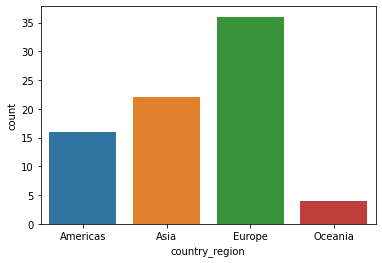